# Algoritma Pengelompokan

Dalam Pembelajaran Mesin, jenis Pembelajaran secara umum dapat diklasifikasikan menjadi tiga jenis:

1. Pembelajaran Supervised,
2. Pembelajaran Unsupervised, dan
3. Pembelajaran Semi-Supervised.

Algoritma yang termasuk dalam keluarga Pembelajaran Tanpa Pengawasan tidak memiliki variabel untuk diprediksi yang terkait dengan data. Alih-alih memiliki keluaran, data hanya memiliki masukan yang berupa beberapa variabel yang menggambarkan data. Di sinilah pengelompokan berperan.

Pengelompokan adalah tugas mengelompokkan sekumpulan objek sedemikian rupa sehingga objek dalam klaster yang sama lebih mirip satu sama lain daripada objek dalam klaster lain. Kesamaan adalah metrik yang mencerminkan kekuatan hubungan antara dua objek data. Pengelompokan terutama digunakan untuk penggalian data eksploratif. Pengelompokan memiliki banyak kegunaan dalam banyak bidang seperti pembelajaran mesin, pengenalan pola, analisis gambar, pengambilan informasi, bioinformatika, kompresi data, dan grafik komputer.

## K-Means

Ada banyak model untuk **pengelompokan** di luar sana. Kita akan membahas beberapa model yang paling populer. Meskipun sederhana, **K-means** banyak digunakan untuk pengelompokan dalam banyak aplikasi ilmu data, terutama berguna jika Anda perlu menemukan wawasan dengan cepat dari **data yang tidak berlabel**. Dalam buku catatan ini, kita akan melihat cara menggunakan k-Means untuk segmentasi pelanggan.

In [24]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv('../data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


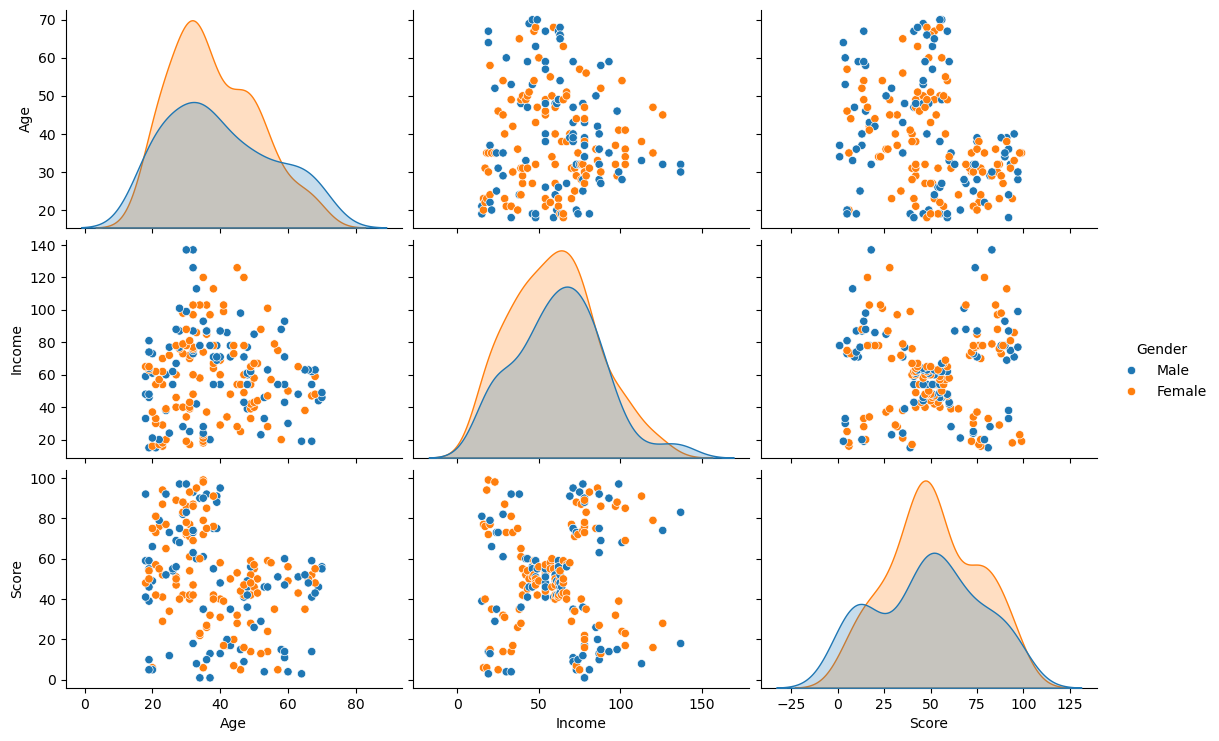

In [28]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

From the above plot we see that gender has no direct relation to segmenting customers. That's why we can drop it and move on with other features which is why we will X parameter from now on.

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

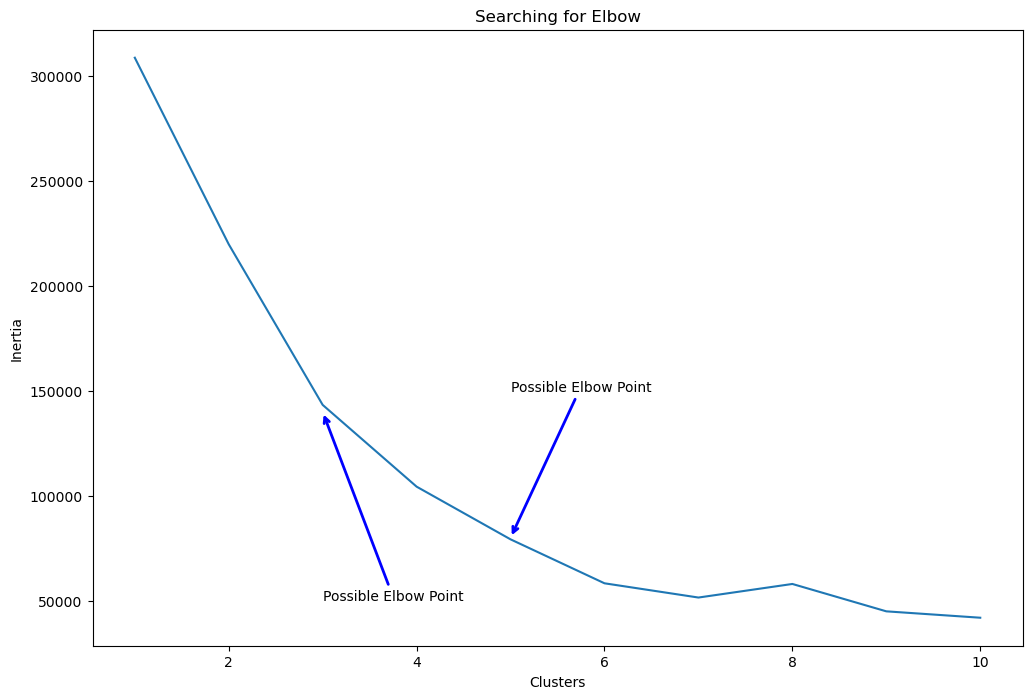

In [29]:
from sklearn.cluster import KMeans
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "1"
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

Metode Elbow memberi tahu kita untuk memilih klaster ketika ada perubahan inersia yang signifikan. Seperti yang dapat kita lihat dari grafik, kita dapat mengatakan ini mungkin 3 atau 5. Mari kita lihat kedua hasil dalam grafik dan putuskan.

### Membuat Plot Visual

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


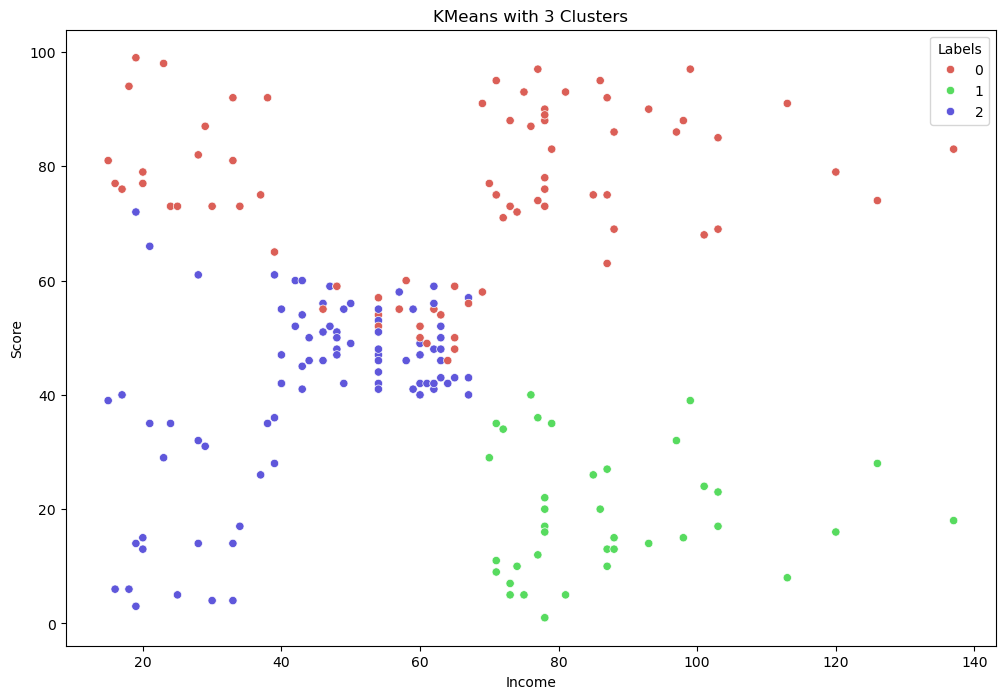

In [30]:
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


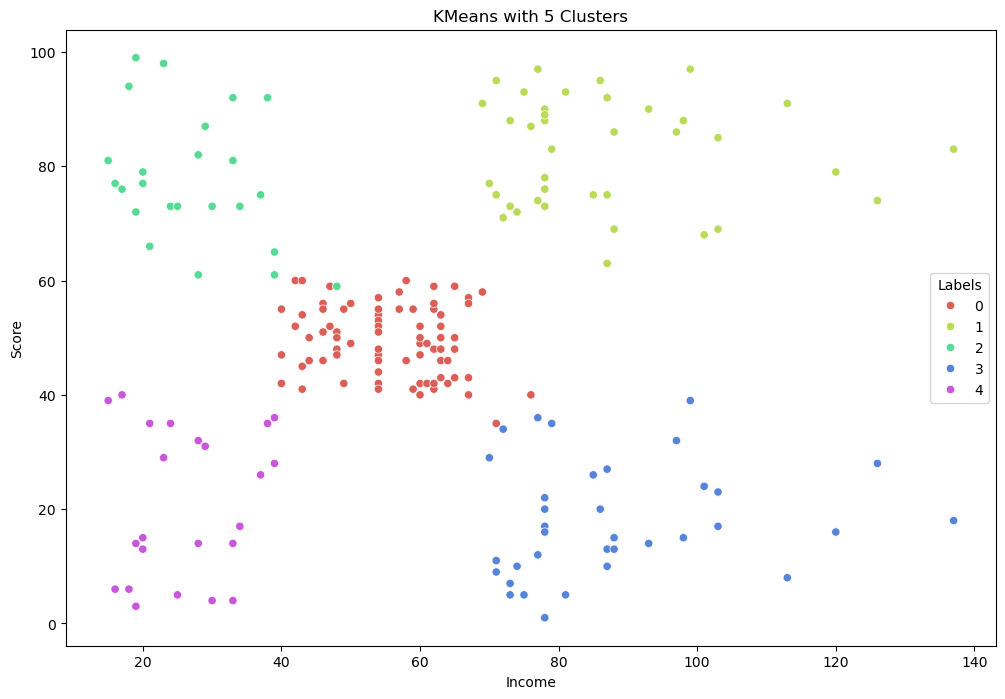

In [31]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.title('KMeans with 5 Clusters')
plt.show()

Dengan menilai dari plot, kita dapat mengatakan bahwa 5 klaster tampaknya lebih baik daripada 3 klaster. Karena ini adalah masalah tanpa pengawasan, kita tidak dapat benar-benar tahu pasti klaster mana yang terbaik dalam kehidupan nyata, tetapi dengan melihat data, dapat dipastikan bahwa klaster 5 akan menjadi pilihan kita.

Kita dapat menganalisis 5 klaster kita secara terperinci sekarang:

- `Label 0` adalah berpenghasilan rendah dan pengeluaran rendah
- `Label 1` adalah berpenghasilan tinggi dan pengeluaran tinggi
- `Label 2` adalah berpenghasilan menengah dan pengeluaran menengah
- `Label 3` adalah berpenghasilan tinggi dan pengeluaran rendah
- `Label 4` adalah berpenghasilan rendah dan pengeluaran tinggi

Mari kita lihat lebih jelas dengan swarmplot:

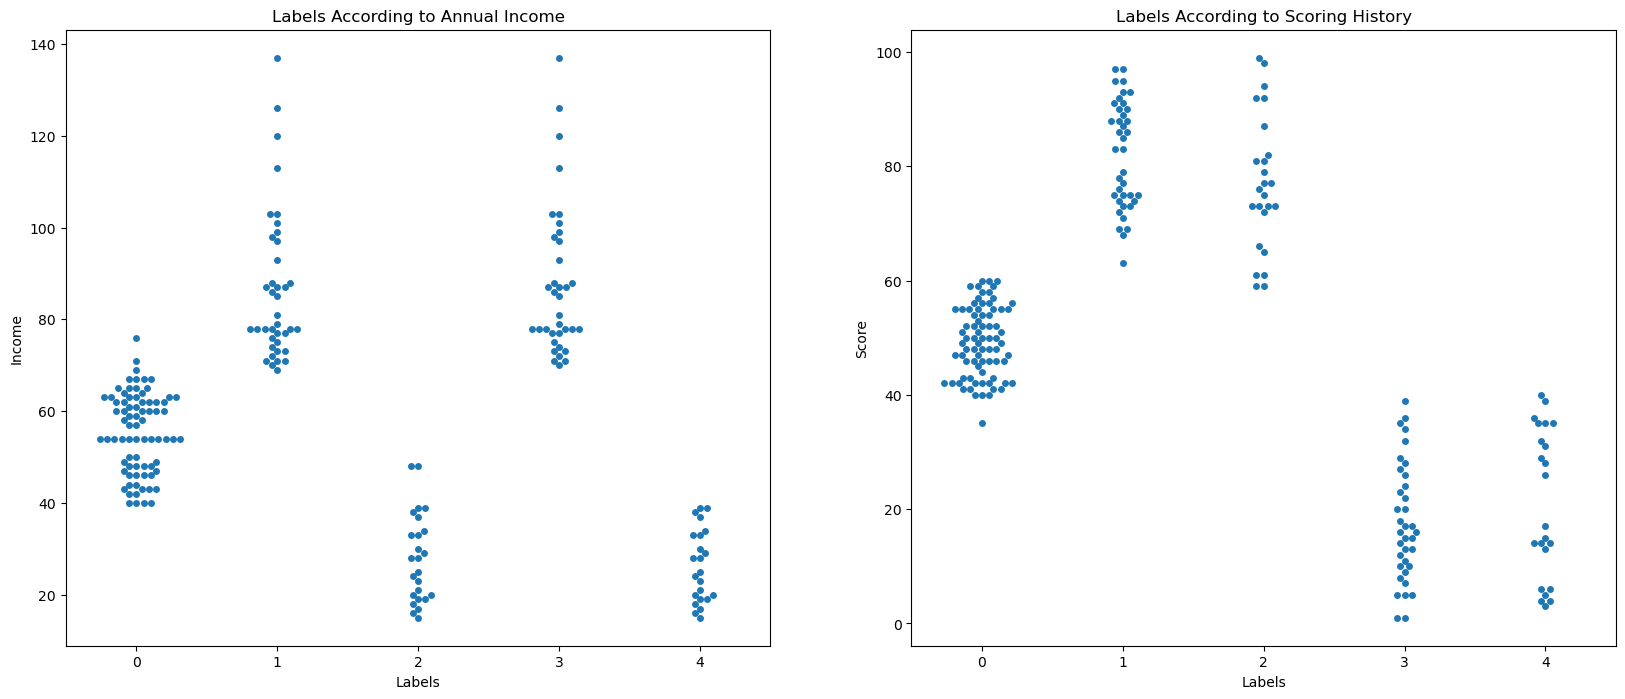

In [32]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

Kita dapat melihat klaster kita dengan jelas seperti yang telah kita tunjukkan sebelumnya.

## Pengelompokan Hirarkis

## Aglomeratif

Kita akan melihat teknik pengelompokan, yaitu <b>Pengelompokan Hirarkis Aglomeratif</b>. Aglomeratif adalah pendekatan bottom-up yang lebih populer daripada pengelompokan Divisif. <br> <br>
Kita juga akan menggunakan Keterkaitan Lengkap sebagai Kriteria Keterkaitan. <br>

Kelas <b>Pengelompokan Aglomeratif</b> akan memerlukan dua masukan:
<ul>
    <li> <b>n_klaster</b>: Jumlah klaster yang akan dibentuk serta jumlah centroid yang akan dihasilkan. </li>
    <li> <b>keterkaitan</b>: Kriteria keterkaitan yang akan digunakan. Kriteria keterkaitan menentukan jarak yang akan digunakan antara set pengamatan. Algoritme akan menggabungkan pasangan klaster yang meminimalkan kriteria ini. </li>
    <ul>
        <li> Nilainya adalah: 'lengkap' </li>
        <li> <b>Catatan</b>: Sebaiknya coba semuanya dengan 'rata-rata' juga </li>
    </ul>
</ul>

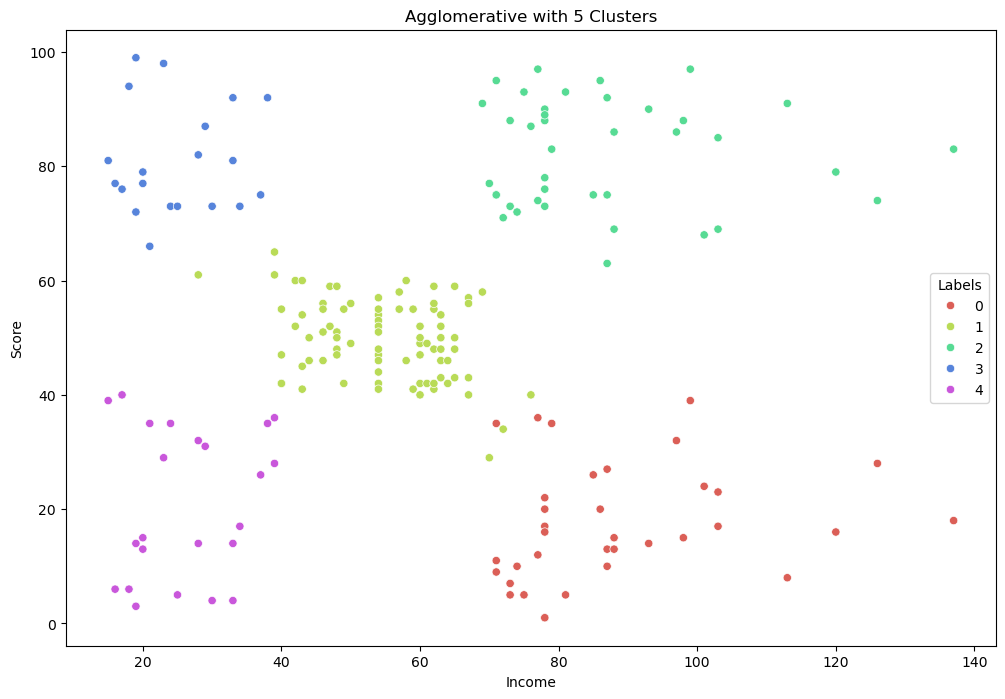

In [33]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.title('Agglomerative with 5 Clusters')
plt.show()

### Dendrogram Terkait untuk Pengelompokan Hirarkis Aglomeratif
Ingatlah bahwa <b>matriks jarak</b> berisi <b>jarak dari setiap titik ke setiap titik lain dari suatu kumpulan data </b>. <br>
Kita dapat menggunakan fungsi <b>matriks_jarak, </b> yang memerlukan <b>dua masukan</b>.
Ingatlah bahwa nilai jarak bersifat simetris, dengan diagonal 0. Ini adalah salah satu cara untuk memastikan matriks Anda benar. <br>

In [34]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul>

In [35]:
Z = hierarchy.linkage(dist, 'complete')

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_13540\3045749611.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'complete')


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

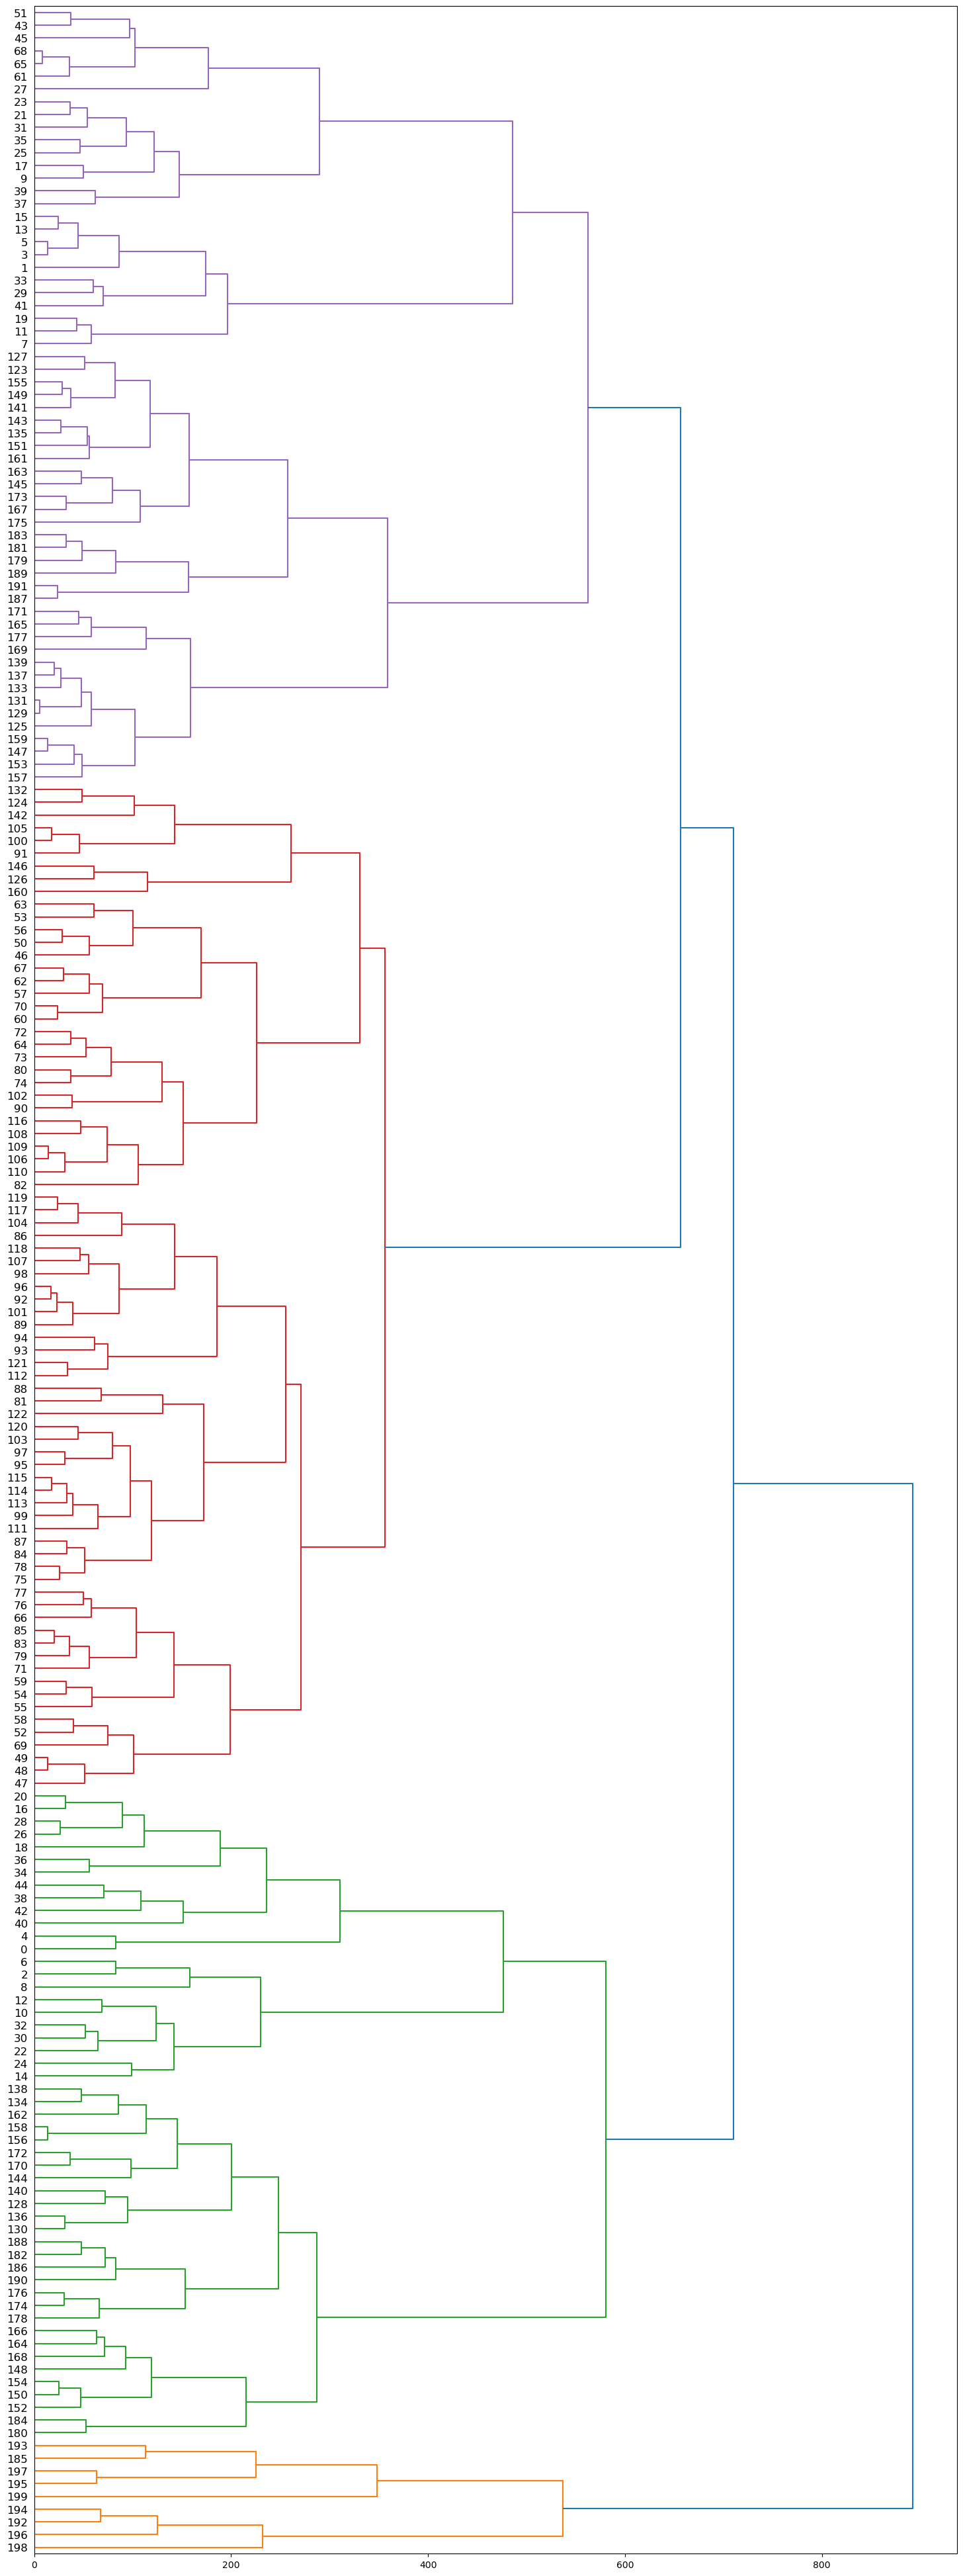

In [36]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

Kami menggunakan tautan __complete__ untuk kasus kita, mari ubah ke tautan __average__ untuk melihat bagaimana dendogram berubah.

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_13540\2848005678.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


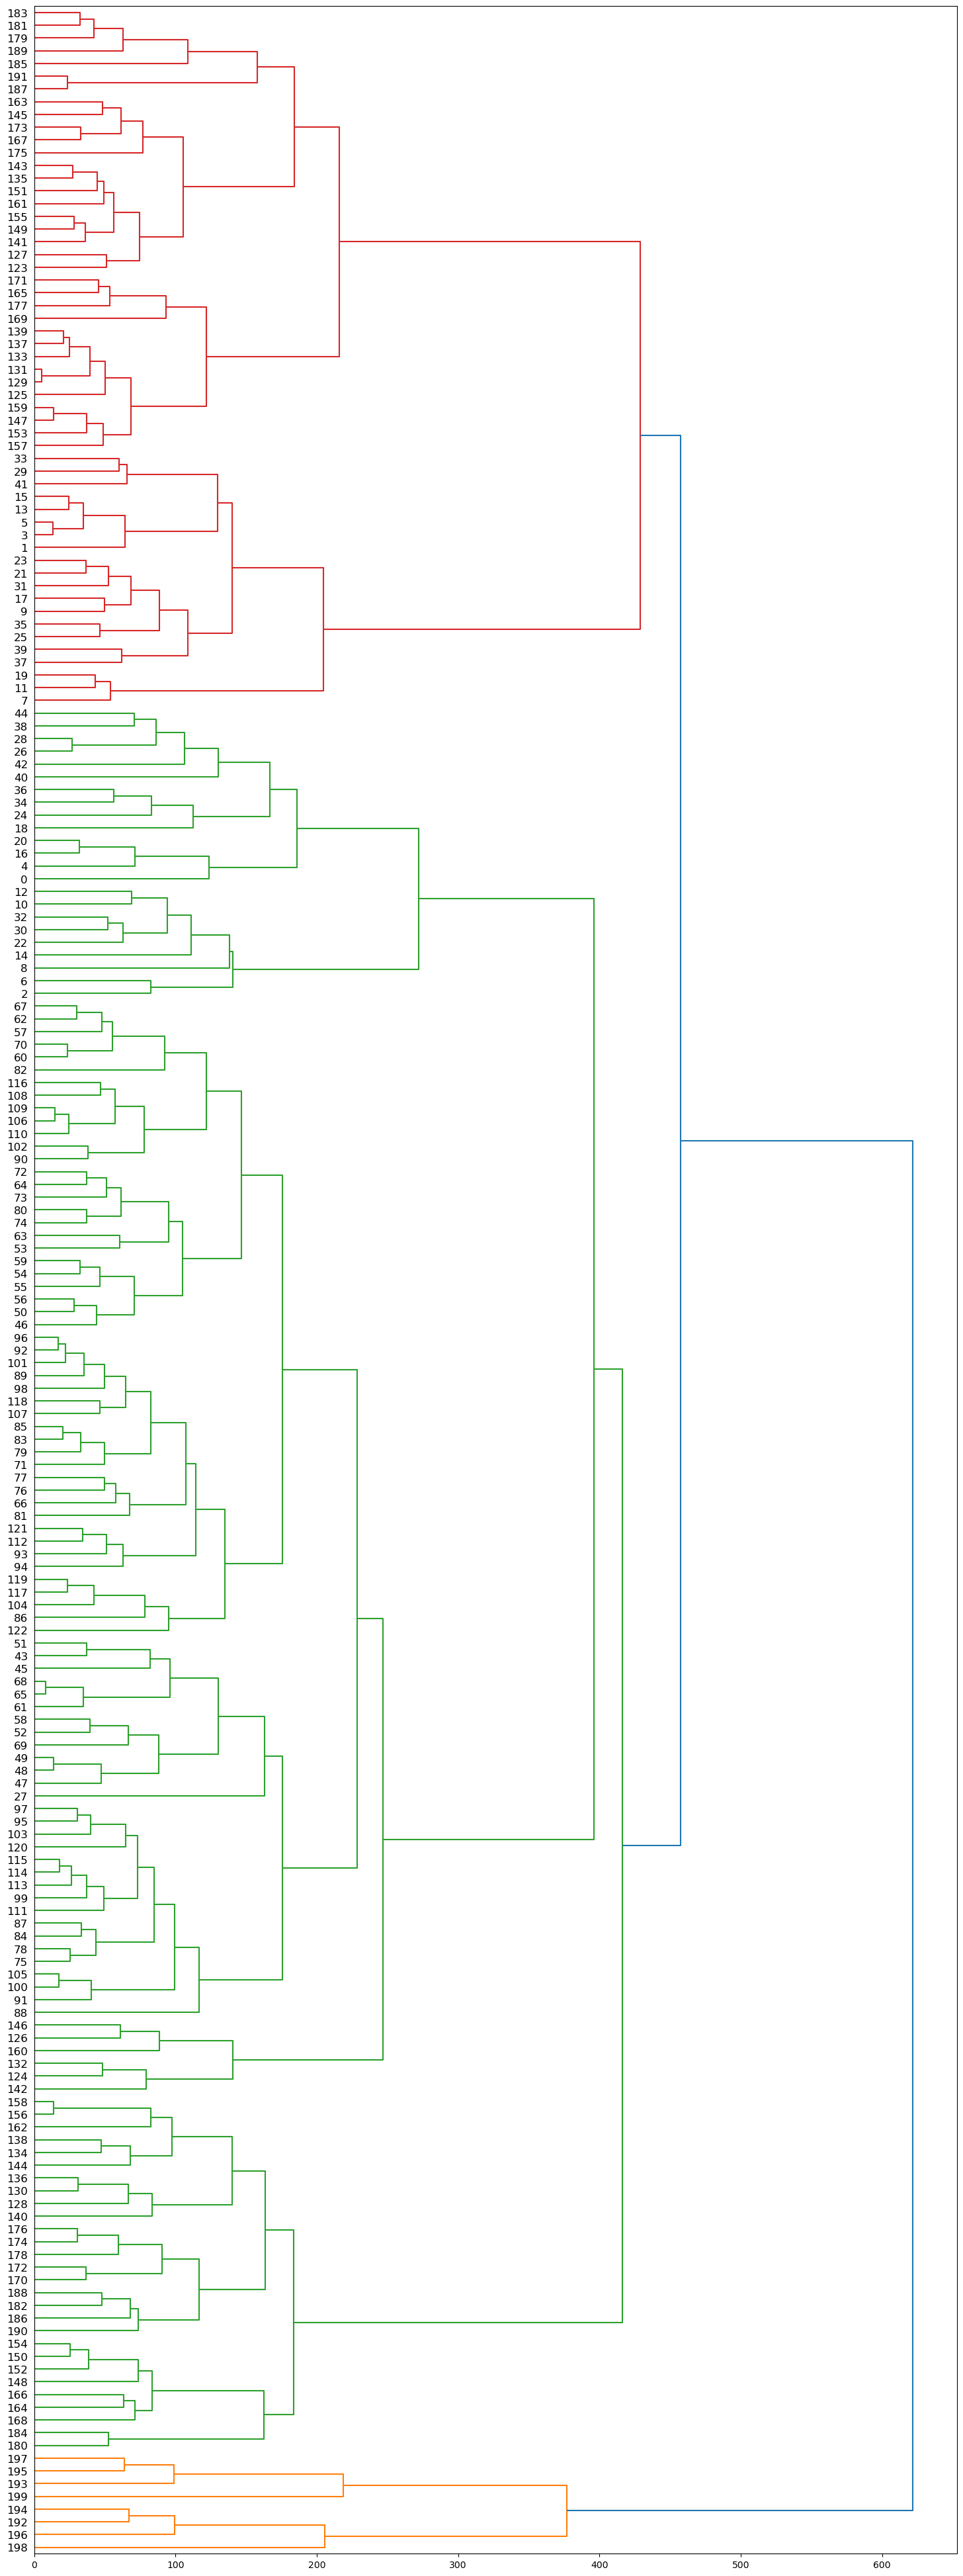

In [37]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Pengelompokan Berbasis Kepadatan (DBSCAN)

Sebagian besar teknik pengelompokan tradisional, seperti k-means, pengelompokan hierarkis dan fuzzy, dapat digunakan untuk mengelompokkan data tanpa pengawasan.

Namun, ketika diterapkan pada tugas dengan kluster bentuk arbitrer, atau kluster dalam kluster, teknik tradisional mungkin tidak dapat mencapai hasil yang baik. Artinya, elemen dalam kluster yang sama mungkin tidak memiliki cukup kesamaan atau kinerjanya mungkin buruk.

Selain itu, Pengelompokan Berbasis Kepadatan menemukan wilayah dengan kepadatan tinggi yang dipisahkan satu sama lain oleh wilayah dengan kepadatan rendah. Kepadatan, dalam konteks ini, didefinisikan sebagai jumlah titik dalam radius tertentu.

Pada bagian ini, fokus utama akan memanipulasi data dan properti DBSCAN dan mengamati pengelompokan yang dihasilkan.

### Pemodelan
DBSCAN adalah singkatan dari Density-Based Spatial Clustering of Applications with Noise. Teknik ini adalah salah satu algoritma pengelompokan paling umum yang bekerja berdasarkan kepadatan objek. Seluruh idenya adalah jika suatu titik tertentu termasuk dalam suatu klaster, titik tersebut harus dekat dengan banyak titik lain dalam klaster tersebut.

Ia bekerja berdasarkan dua parameter: Epsilon dan Titik Minimum
__Epsilon__ menentukan radius tertentu yang jika mencakup jumlah titik yang cukup, kita menyebutnya area padat
__minimumSamples__ menentukan jumlah titik data minimum yang kita inginkan dalam suatu lingkungan untuk menentukan klaster.

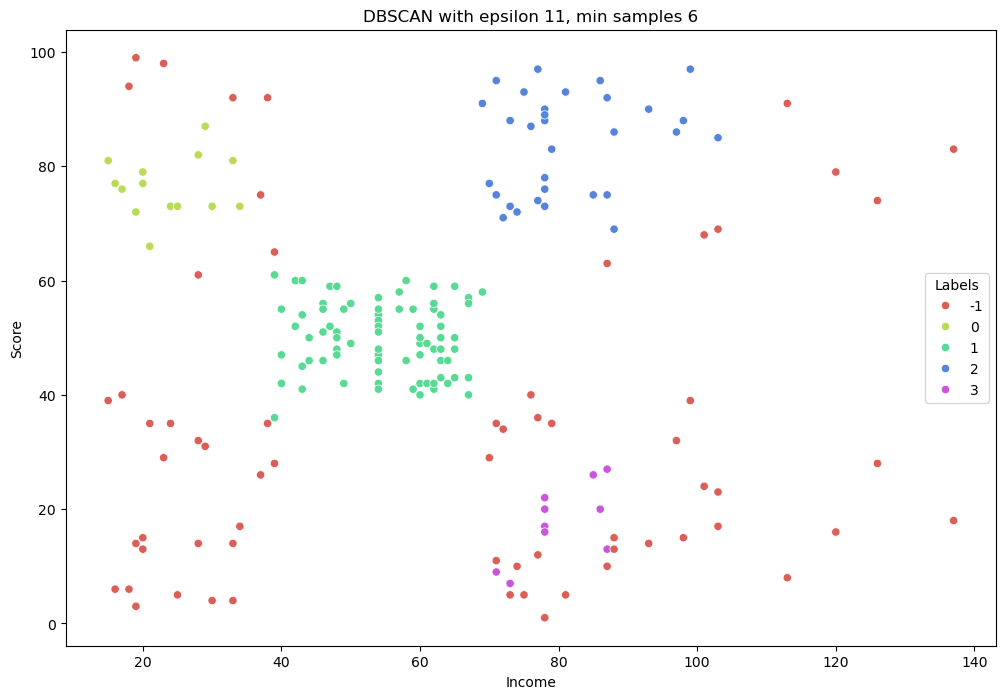

In [38]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))

plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()


Seperti yang dapat kita lihat, DBSCAN tidak bekerja dengan baik karena kepadatan dalam data kita tidak begitu kuat. Label -1 berarti outlier sehingga akan muncul sebagai outlier. Kita mungkin akan bekerja lebih baik jika kita memiliki data yang lebih besar.

## Algoritma Mean Shift

Pengelompokan MeanShift bertujuan untuk menemukan gumpalan dalam kepadatan sampel yang halus. Ini adalah algoritma berbasis centroid, yang bekerja dengan memperbarui kandidat untuk centroid menjadi rata-rata titik dalam wilayah tertentu. Kandidat ini kemudian difilter dalam tahap pasca-pemrosesan untuk menghilangkan duplikat yang hampir sama untuk membentuk set centroid akhir.

Algoritma secara otomatis mengatur jumlah kluster, alih-alih bergantung pada parameter bandwidth, yang menentukan ukuran wilayah untuk mencari. Parameter ini dapat diatur secara manual, tetapi dapat diperkirakan menggunakan fungsi estimate_bandwidth yang disediakan, yang dipanggil jika bandwidth tidak diatur.

In [39]:
ms = MeanShift(bandwidth=bandwidth).fit(X)


Bandwidth: 22.21702645600276


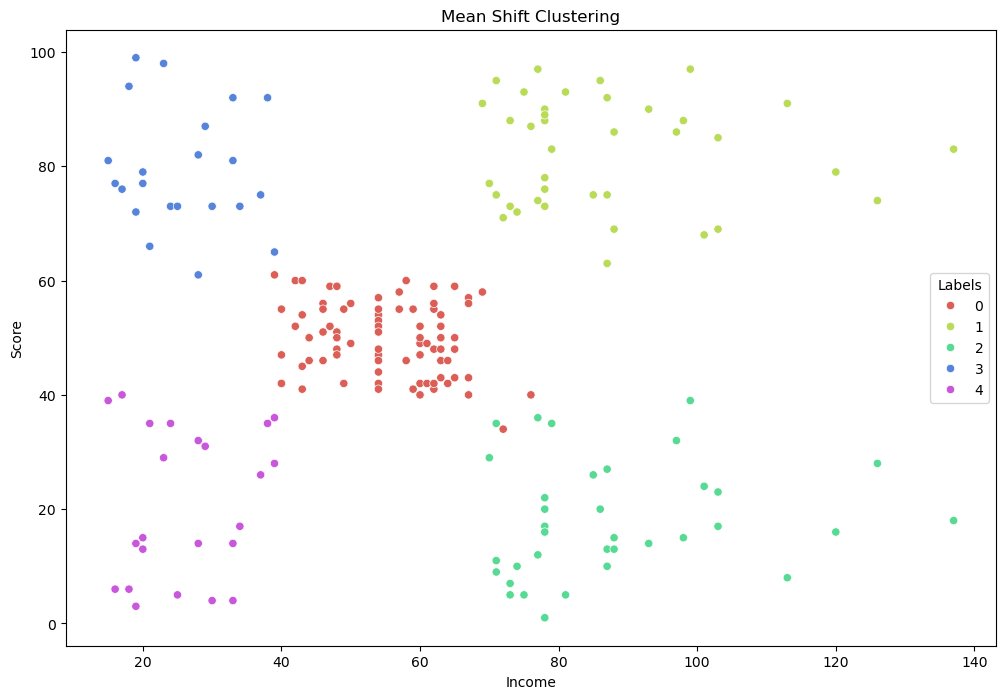

In [40]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsi X adalah DataFrame atau array 2D yang sudah didefinisikan
# Contoh: X = pd.DataFrame({'Income': [...], 'Score': [...]})

# Menghitung bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.1)
print("Bandwidth:", bandwidth)  # Cek nilai bandwidth

# Memastikan bandwidth adalah angka yang valid
if bandwidth > 0:
    # Inisialisasi MeanShift dengan argumen kata kunci
    ms = MeanShift(bandwidth=bandwidth).fit(X)
    X['Labels'] = ms.labels_
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', len(set(ms.labels_))))
    plt.title('Mean Shift Clustering')
    plt.show()
else:
    print("Invalid bandwidth value.")


In [41]:
print("Bandwidth:", bandwidth)

Bandwidth: 22.21702645600276


## Rangkuman Semua di Satu Tempat

Mari visualisasikan semua algoritma yang telah kita gunakan sejauh ini dan lihat distribusi pengelompokannya.

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Estimated Bandwidth: 22.21702645600276


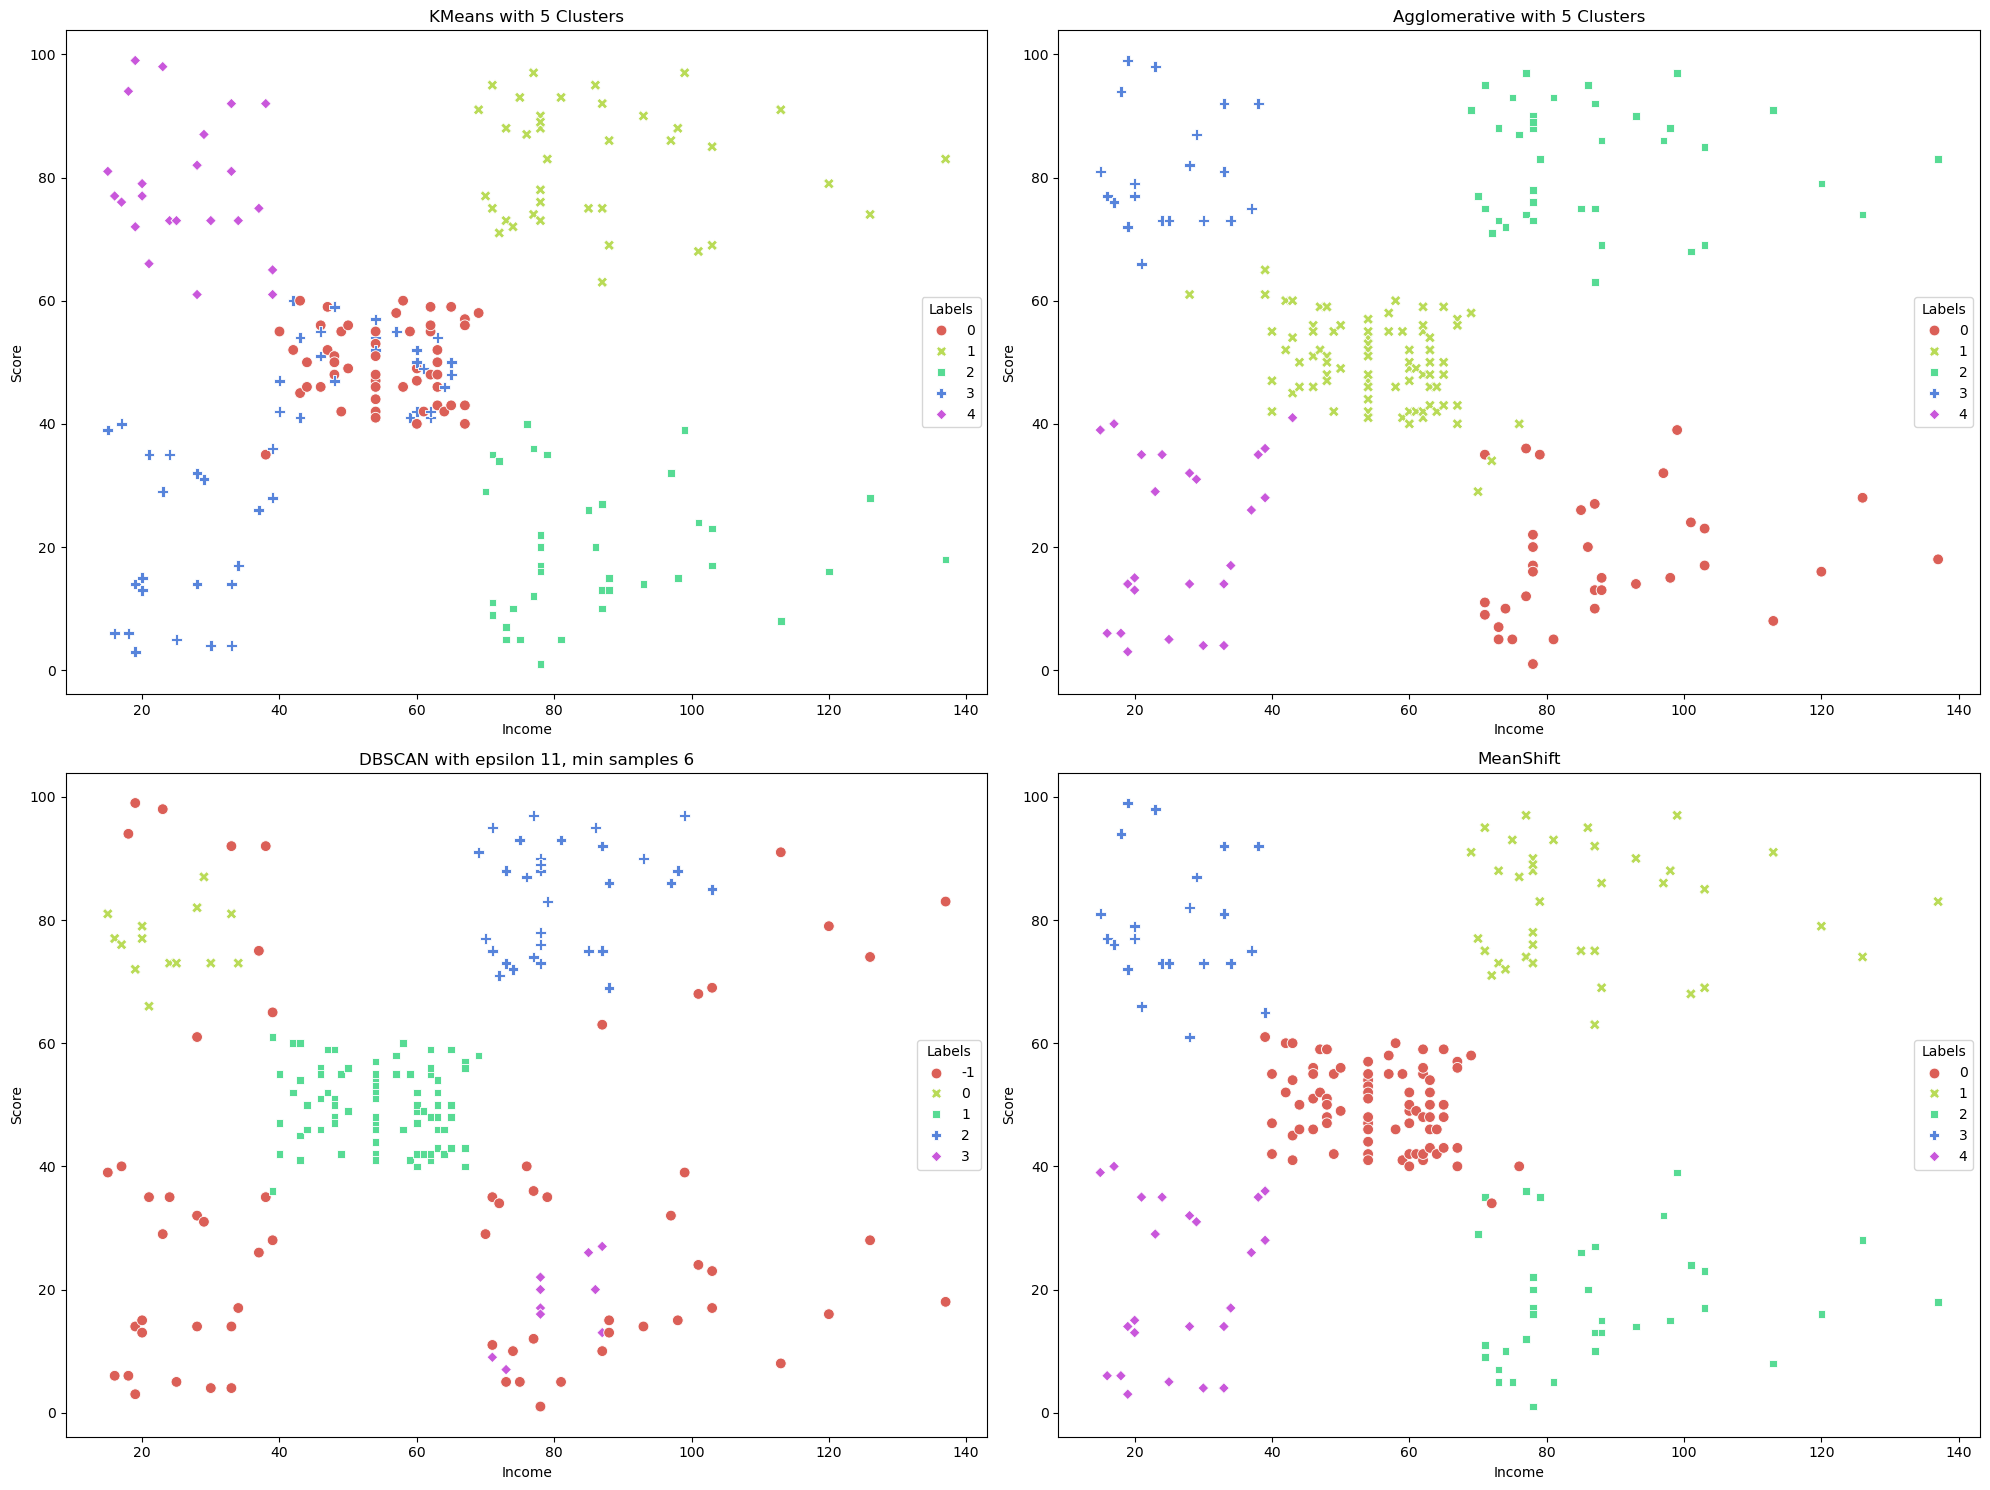

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.cluster import estimate_bandwidth

# Asumsi X adalah DataFrame atau array 2D yang sudah didefinisikan
# Contoh: X = pd.DataFrame({'Income': [...], 'Score': [...]})

fig = plt.figure(figsize=(20, 15))

##### KMeans #####
ax = fig.add_subplot(221)
km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')

##### Agglomerative Clustering #####
ax = fig.add_subplot(222)
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')

##### DBSCAN #####
ax = fig.add_subplot(223)
db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')

##### MEAN SHIFT #####
ax = fig.add_subplot(224)
bandwidth = estimate_bandwidth(X, quantile=0.1)
print("Estimated Bandwidth:", bandwidth)  # Print bandwidth untuk debug
if bandwidth > 0:
    ms = MeanShift(bandwidth=bandwidth).fit(X)
    X['Labels'] = ms.labels_
    sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                    palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
    ax.set_title('MeanShift')
else:
    print("Invalid bandwidth value, cannot perform MeanShift.")

plt.tight_layout()
plt.show()
